<a href="https://colab.research.google.com/github/nicole-yoong/Portfolio/blob/main/Diabetes_Detection/%5BPart_3%5D_Supervised_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [ ]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std
from imblearn.under_sampling import NearMiss


import time
print("Setup complete.")

Setup complete.


# Loading data

In [ ]:
df = pd.read_csv('/content/DiabetesClassificationDataset2022.csv')
df.head(5)

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,...,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,...,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,...,46.0,0,0,0,0,0,0,0,1,1


# Data cleaning

## Missing values

In [ ]:
#check how many missing values in each column

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing %'])
missing_data.head(88)


,Total,Missing %
h1_bilirubin_min,72849,0.920287
h1_bilirubin_max,72849,0.920287
h1_albumin_min,72271,0.912985
h1_albumin_max,72271,0.912985
h1_lactate_min,71985,0.909372
h1_lactate_max,71985,0.909372
h1_pao2fio2ratio_max,68816,0.869339
h1_pao2fio2ratio_min,68816,0.869339
h1_arterial_ph_max,65389,0.826046
h1_arterial_ph_min,65389,0.826046


In [ ]:
#dealing with missing data
df = df.drop((missing_data[missing_data['Missing %'] > 0.6]).index,1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
df.shape

(79159, 50)

### Random fill-in

In [ ]:
from random import choice

mask = df["gender"].isna()
df.loc[mask,["gender"]] = df.loc[mask,["gender"]].applymap(lambda _: choice(["M","F"]))

In [ ]:
mask = df["ethnicity"].isna()
df.loc[mask,["ethnicity"]] = df.loc[mask,["ethnicity"]].applymap(lambda _: choice(["Caucasian","African American",
                                                                             'Other/Unknown', 'Hispanic', 'Asian', 'Native American']))

### Imputation 

In [ ]:
imp_df= df.fillna(method='bfill', axis=0).fillna(0)
imp_df.describe() 

,encounter_id,hospital_id,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
count,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.0,79159.000000,79159.000000,...,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000,79159.000000
mean,212863.726740,106.188620,62.454036,0.189404,169.565825,85.141136,29.602947,0.0,36.721336,36.612534,...,87.269899,0.000834,0.016713,0.013744,0.025379,0.007327,0.004080,0.020781,0.332243,0.355639
std,38113.816591,63.776527,16.451232,0.391831,10.831737,25.462159,8.485454,0.0,0.769038,0.793106,...,42.058765,0.028863,0.128195,0.116429,0.157275,0.085284,0.063748,0.142651,0.471020,0.478709
min,147001.000000,1.000000,0.000000,0.000000,137.200000,38.600000,14.844926,0.0,33.400000,32.900000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,179772.000000,49.000000,53.000000,0.000000,162.500000,67.800000,23.876404,0.0,36.400000,36.300000,...,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,212864.000000,112.000000,65.000000,0.000000,170.000000,81.600000,28.039729,0.0,36.700000,36.700000,...,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,245812.000000,165.000000,75.000000,0.000000,177.800000,98.430000,33.421693,0.0,37.100000,37.000000,...,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,278997.000000,204.000000,89.000000,1.000000,195.590000,186.000000,67.814990,0.0,39.500000,39.300000,...,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#check missing values again
df.isnull().sum().max() 

46477

In [ ]:
df = imp_df

## Removing columns

### Removing not useful columns

In [ ]:
#drop the columns that are not useful
df = df.loc[:, ~df.columns.isin(["encounter_id", "hospital_id", 'height', 'weight','readmission_status'])]

### Removing highly correlated columns

In [ ]:
X = df.loc[:, ~df.columns.isin(['diabetes_mellitus'])]

#extract the target column
y = df["diabetes_mellitus"] 

In [ ]:
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)


['d1_albumin_min', 'd1_bilirubin_min', 'd1_bun_min', 'd1_platelets_min', 'd1_wbc_min', 'h1_glucose_min']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
df = df.loc[:, ~df.columns.isin(['d1_albumin_min', 'd1_bilirubin_min', 'd1_bun_min', 'd1_platelets_min', 'd1_wbc_min', 'h1_glucose_min'])]

## Categorical and Numerical 

In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 3.4 MB/s 


In [ ]:
#divide our columns in to the categorical and numerical columns for variables that are useful for prediction of diabetes

cat_col = ["gender", "ethnicity", "icu_type"]
num_col = df.loc[:, ~df.columns.isin(["gender", "ethnicity", "icu_type"])]

In [ ]:
#Let us run loop of value_counts of each column to find out unique values. 
for col in df[cat_col]:
    print ("---- %s ---" % col)
    print (df[col].value_counts())

---- gender ---
M    42925
F    36234
Name: gender, dtype: int64
---- ethnicity ---
Caucasian           60520
African American     8957
Other/Unknown        4076
Hispanic             3307
Asian                1536
Native American       763
Name: ethnicity, dtype: int64
---- icu_type ---
Med-Surg ICU    43608
MICU             6816
CCU-CTICU        6809
Neuro ICU        6077
Cardiac ICU      5069
SICU             4902
CSICU            3138
CTICU            2740
Name: icu_type, dtype: int64


### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ["ethnicity", "icu_type", 'gender']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.loc[:, df.columns.isin(["gender", "ethnicity", "icu_type"])].head(10)

,gender,ethnicity,icu_type
0,1,2,2
1,0,2,5
2,0,2,2
3,1,2,5
4,0,2,5
5,1,2,5
6,0,2,5
7,0,2,4
8,1,2,4
9,0,2,0


# Feature Selection

In [ ]:
X = df.loc[:, ~df.columns.isin(["diabetes_mellitus"])]
y = df["diabetes_mellitus"] 

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=mutual_info_classif, k='all')

# transform train input data
Xfs = selector.fit_transform(X,y)

In [ ]:
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                     Feat_names  Mutual_info
20               h1_glucose_max     0.080338
4                           bmi     0.029338
11               d1_glucose_min     0.027658
27            creatinine_apache     0.022266
10                   d1_bun_max     0.020001
9              d1_bilirubin_max     0.013994
21                   wbc_apache     0.012273
2                           age     0.010475
25             gcs_motor_apache     0.009621
15             d1_potassium_max     0.009008
5                      icu_type     0.008554
13                  d1_hco3_min     0.008053
26              gcs_eyes_apache     0.007729
19                   d1_wbc_max     0.006314
1                     ethnicity     0.006211
24            heart_rate_apache     0.005727
28                  h1_spo2_max     0.004374
12                  d1_hco3_max     0.004367
0                        gender     0.004121
6                   h1_temp_max     0.003923
8                d1_albumin_max     0.003167
17        

# Model building

## Define X and Y

In [ ]:
X = df.loc[:, df.columns.isin(['h1_glucose_max', 'd1_glucose_min', 'bmi', 'd1_bun_max', 'creatinine_apache', 
                               'd1_bilirubin_max'])]
y = df["diabetes_mellitus"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1024, stratify=y, shuffle=True)
nr = NearMiss()
X_train, y_train = nr.fit_resample(X_train, y_train.ravel())


In [ ]:
pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=2))
                 ])

x_train = pipe_dt.fit_transform(X_train)
x_test = pipe_dt.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(39412, 6) (39412,) (23748, 6)


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=1024)

## LR

### No tuned

In [ ]:
# compute training time
t_start = time.process_time()
lr = LogisticRegression(random_state=1024)
lr.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = lr.score(x_train, y_train)

y_pred = lr.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

0.13391291800000005
0.7569521973003146
              precision    recall  f1-score   support

           0       0.70      0.67      0.69     15302
           1       0.45      0.48      0.47      8446

    accuracy                           0.61     23748
   macro avg       0.58      0.58      0.58     23748
weighted avg       0.61      0.61      0.61     23748



### Tuned

In [ ]:
t_start = time.process_time()
param_grid = {'penalty': ['l1', 'l2'], 
              'solver' :['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter': [100, 500, 1000, 1500, 2500]
             }
lr = LogisticRegression(random_state=1024)
tuned_lr = RandomizedSearchCV(estimator = lr, param_distributions = param_grid, cv = cv_method)
tuned_lr.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_lr.score(x_train, y_train)

best_estimator = tuned_lr.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

18.374216382
0.7569521973003146
              precision    recall  f1-score   support

           0       0.70      0.67      0.69     15302
           1       0.45      0.48      0.47      8446

    accuracy                           0.61     23748
   macro avg       0.58      0.58      0.58     23748
weighted avg       0.61      0.61      0.61     23748



## DTC

### No tuned

In [ ]:
# compute training time
t_start = time.process_time()
dtc = DecisionTreeClassifier(random_state=1024)
dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = dtc.score(x_train, y_train)

y_pred = dtc.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

0.316813904
1.0
              precision    recall  f1-score   support

           0       0.71      0.49      0.58     15302
           1       0.41      0.63      0.50      8446

    accuracy                           0.54     23748
   macro avg       0.56      0.56      0.54     23748
weighted avg       0.60      0.54      0.55     23748



([<matplotlib.axis.YTick at 0x7fe431f423d0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

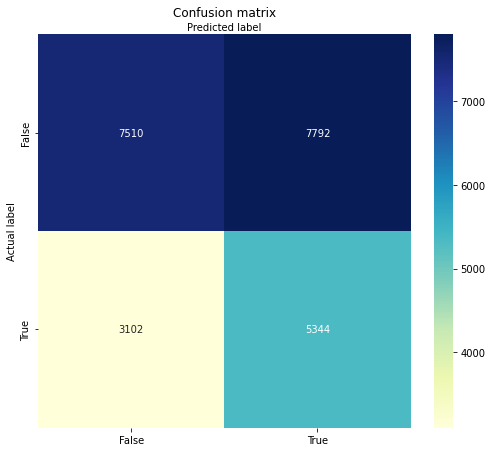

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

### Tuned

In [ ]:
t_start = time.process_time()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state=1024)
tuned_dtc = RandomizedSearchCV(estimator = dtc, param_distributions = param_grid, cv = cv_method)
tuned_dtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_dtc.score(x_train, y_train)

best_estimator = tuned_dtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

16.38149617599999
0.7684969044960925
              precision    recall  f1-score   support

           0       0.73      0.62      0.67     15302
           1       0.46      0.58      0.51      8446

    accuracy                           0.61     23748
   macro avg       0.59      0.60      0.59     23748
weighted avg       0.63      0.61      0.61     23748



([<matplotlib.axis.YTick at 0x7fe431982110>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

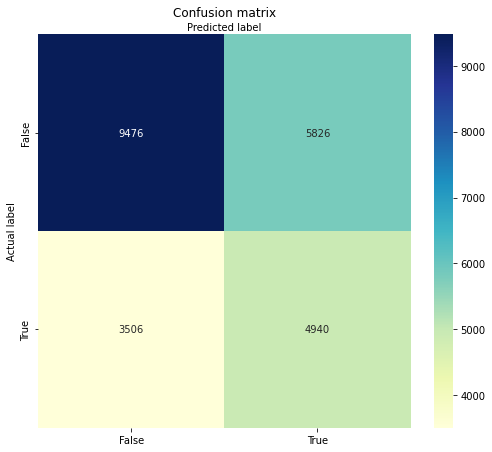

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

## EDTC

### No tuned

In [ ]:
# compute training time
t_start = time.process_time()
edtc = ExtraTreesClassifier(random_state=1024)
edtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = edtc.score(x_train, y_train)

y_pred = edtc.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

2.859896231999997
1.0
              precision    recall  f1-score   support

           0       0.71      0.51      0.59     15302
           1       0.41      0.63      0.50      8446

    accuracy                           0.55     23748
   macro avg       0.56      0.57      0.54     23748
weighted avg       0.60      0.55      0.56     23748



### Tuned

In [ ]:
t_start = time.process_time()
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
edtc = ExtraTreesClassifier(random_state=1024)
tuned_edtc = RandomizedSearchCV(estimator = edtc, param_distributions = param_grid, cv = cv_method)
tuned_edtc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = tuned_edtc.score(x_train, y_train)

best_estimator = tuned_edtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

67.57983537
0.7665939307825028
              precision    recall  f1-score   support

           0       0.73      0.66      0.69     15302
           1       0.48      0.56      0.51      8446

    accuracy                           0.62     23748
   macro avg       0.60      0.61      0.60     23748
weighted avg       0.64      0.62      0.63     23748



## BDTC

### No tuned

In [ ]:
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state = 1024)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(bag, x_train, y_train, scoring='accuracy', cv = cv_method, n_jobs=-1, error_score='raise')

bag.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start

train_score = bag.score(x_train, y_train)

y_pred = bag.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

69.74409546
0.9768344666599006
              precision    recall  f1-score   support

           0       0.70      0.53      0.61     15302
           1       0.41      0.59      0.49      8446

    accuracy                           0.55     23748
   macro avg       0.56      0.56      0.55     23748
weighted avg       0.60      0.55      0.56     23748



### Tuned

In [ ]:
t_start = time.process_time()

for n in [50, 100, 150]:
  bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators = n, random_state = 1024)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(bag, x_train, y_train, scoring='accuracy', cv = cv_method, n_jobs=-1, error_score='raise')

  bag.fit(x_train, y_train)
  t_end = time.process_time()
  t_diff = t_end - t_start

  print(t_diff)
  print(train_score)
  print(classification_report(y_test, y_pred))

6.802460029000002
0.9768344666599006
              precision    recall  f1-score   support

           0       0.70      0.53      0.61     15302
           1       0.41      0.59      0.49      8446

    accuracy                           0.55     23748
   macro avg       0.56      0.56      0.55     23748
weighted avg       0.60      0.55      0.56     23748

20.552833514000014
0.9768344666599006
              precision    recall  f1-score   support

           0       0.70      0.53      0.61     15302
           1       0.41      0.59      0.49      8446

    accuracy                           0.55     23748
   macro avg       0.56      0.56      0.55     23748
weighted avg       0.60      0.55      0.56     23748



## KNN

### No tuned

In [ ]:
# compute training time
t_start = time.process_time()
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = knn.score(x_train, y_train)

y_pred = knn.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

### Tuned

In [ ]:
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'], 
              'leaf_size': [20,40,1],
                'p': [1,2]}
              
knn = KNeighborsClassifier()
tuned_knn = RandomizedSearchCV(estimator = knn, param_distributions = param_grid, cv = cv_method)
tuned_knn.fit(x_train, y_train)
best_estimator = tuned_knn.best_estimator_
print(best_estimator)
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

## GNB

### No tuned

In [ ]:
# compute training time
t_start = time.process_time()
gnb = GaussianNB()
gnb.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = gnb.score(x_train, y_train)

y_pred = gnb.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

### Tuned

In [ ]:
t_start = time.process_time()

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)
             }
gnb = GaussianNB()
tuned_gnb = RandomizedSearchCV(estimator = gnb, param_distributions = param_grid, cv=cv_method)
tuned_gnb.fit(x_train, y_train)
best_estimator = tuned_gnb.best_estimator_
print(best_estimator)
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

## RFC

### No tuned

In [ ]:
t_start = time.process_time()
rfc = RandomForestClassifier(random_state=1024)
rfc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = rfc.score(x_train, y_train)

y_pred = rfc.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

### Tuned

In [ ]:
param_grid = {'max_depth': [2, 4, 6, 8, 10, 15, 20], 
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
rfc = RandomForestClassifier(random_state=1024)
tuned_rfc = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, cv = cv_method)
tuned_rfc.fit(x_train, y_train)
best_estimator = tuned_rfc.best_estimator_
print(best_estimator)
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

## GBC

### No tuned

In [ ]:
t_start = time.process_time()
gbc = GradientBoostingClassifier(random_state=1024)
gbc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start
train_score = gbc.score(x_train, y_train)

y_pred = gbc.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))

### Tuned

In [ ]:
t_start = time.process_time()
param_grid = {'n_estimators':[5,50,250,500],
              'max_depth':[1,3,5,7,9],
              'learning_rate':[0.01,0.1,1,10,100]
             }
gbc = GradientBoostingClassifier(random_state=1024)
tuned_gbc = RandomizedSearchCV(estimator = gbc, param_distributions = param_grid, cv = cv_method)
tuned_gbc.fit(x_train, y_train)
t_end = time.process_time()
t_diff = t_end - t_start

best_estimator = tuned_gbc.best_estimator_
print(best_estimator)
y_pred = best_estimator.predict(x_test)

print(t_diff)
print(train_score)
print(classification_report(y_test, y_pred))